In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Задание 1. Построение графика DAU

In [2]:
les3dau = pd.read_excel('hw_lesson03_dau.xlsx')
les3dausave = pd.read_excel('hw_lesson03_dau.xlsx')
les3dau['date'] = pd.to_datetime(les3dau['date'])
les3dau.set_index('date', inplace=True)

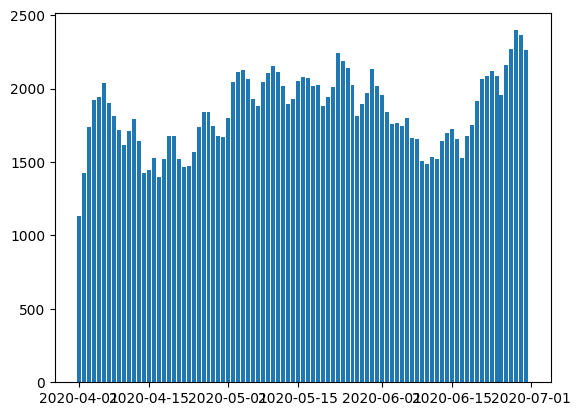

In [3]:
plt.bar(les3dausave['date'], les3dausave['DAU'] )
plt.show()

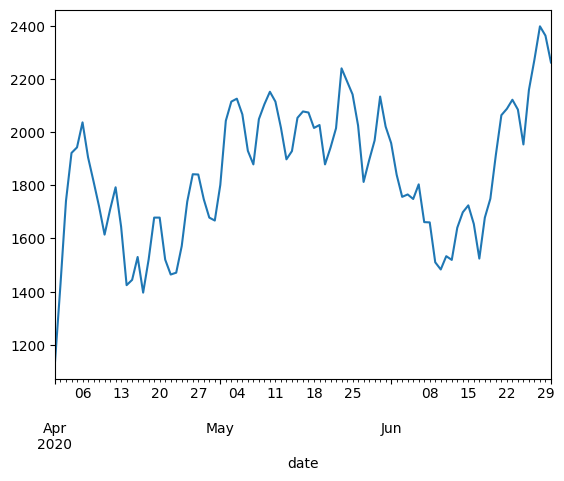

In [4]:
les3dau['DAU'].plot();

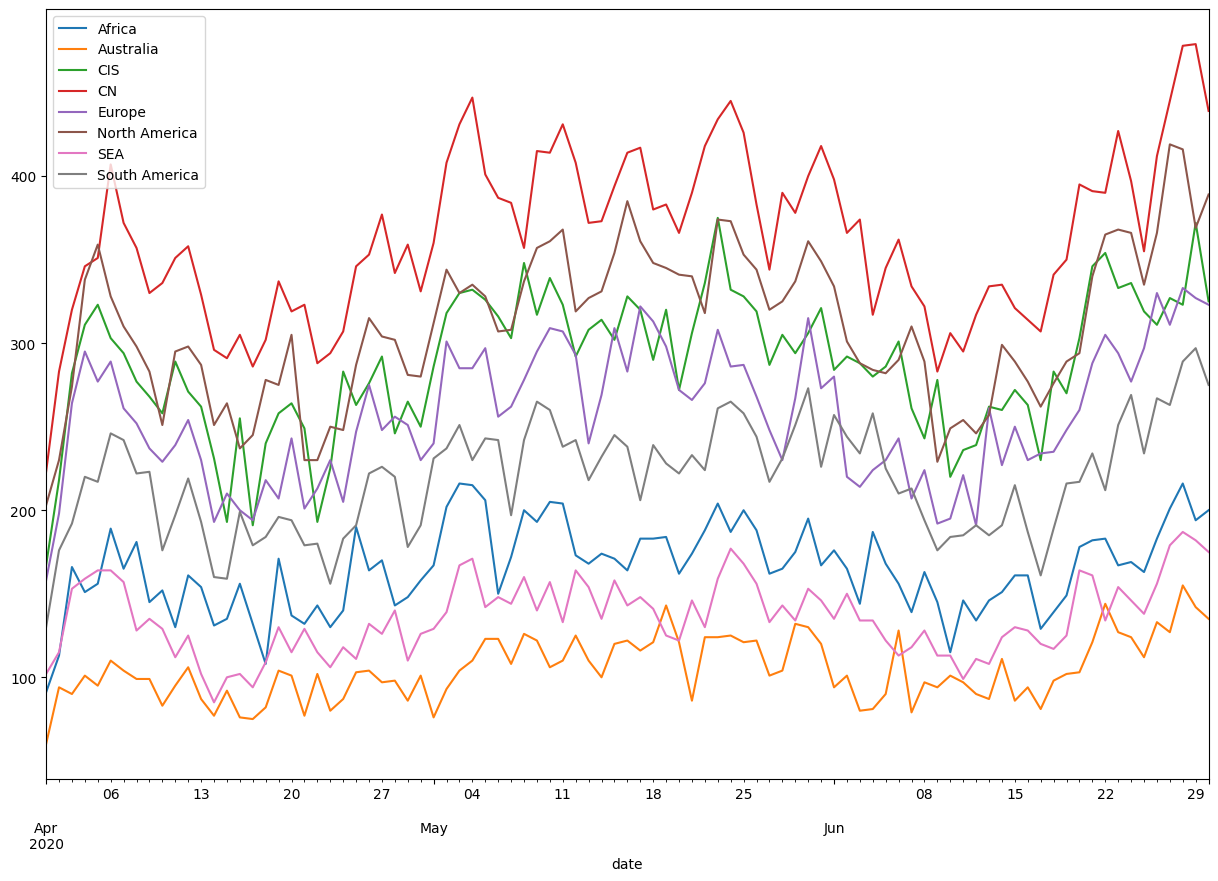

In [5]:
daureg = pd.read_excel('hw_lesson03_dau_region.xlsx')
daureg['date'] = pd.to_datetime(daureg['date'])
daureg.set_index('date', inplace=True)
daureg.plot(figsize=(15, 10));

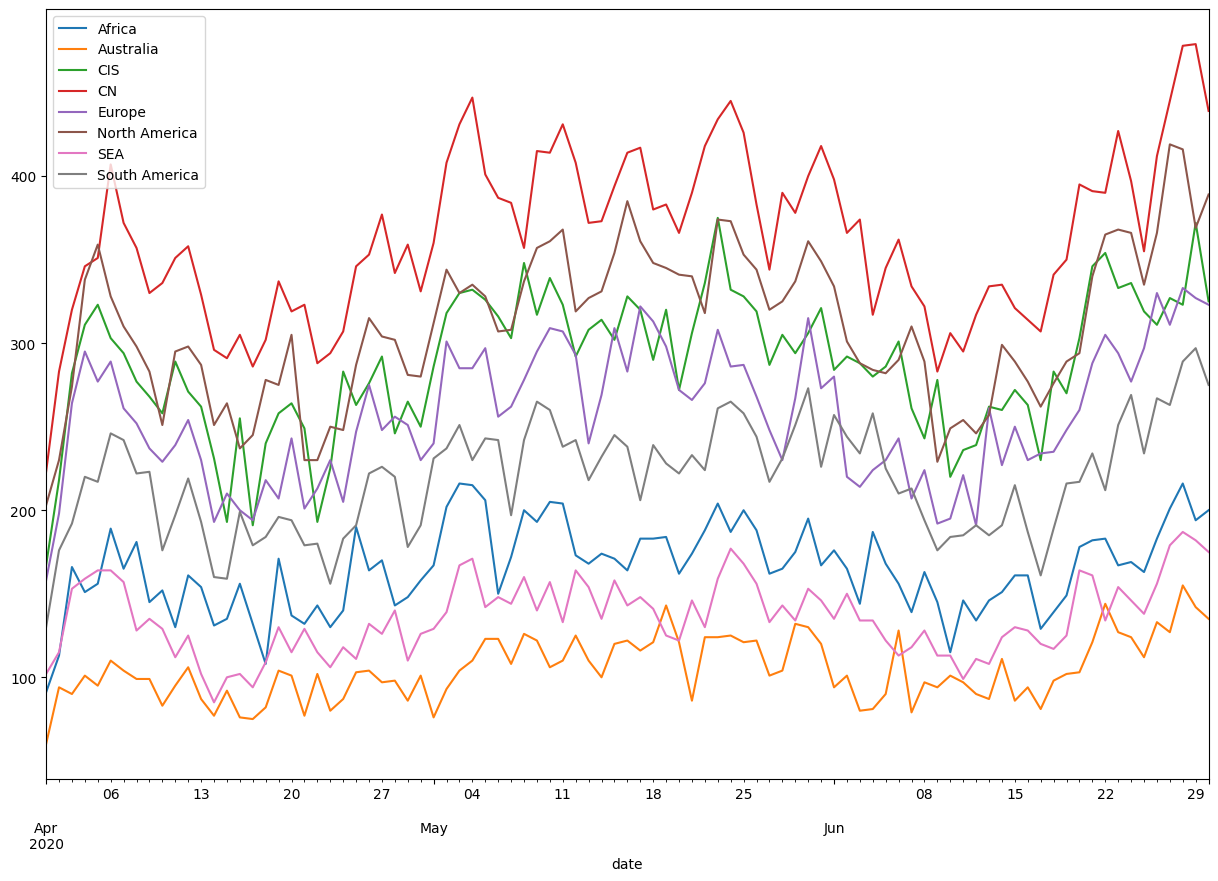

In [6]:
daudev = pd.read_excel('hw_lesson03_dau_region.xlsx')
daudev['date'] = pd.to_datetime(daudev['date'])
daudev.set_index('date', inplace=True)
daudev.plot(figsize=(15, 10));

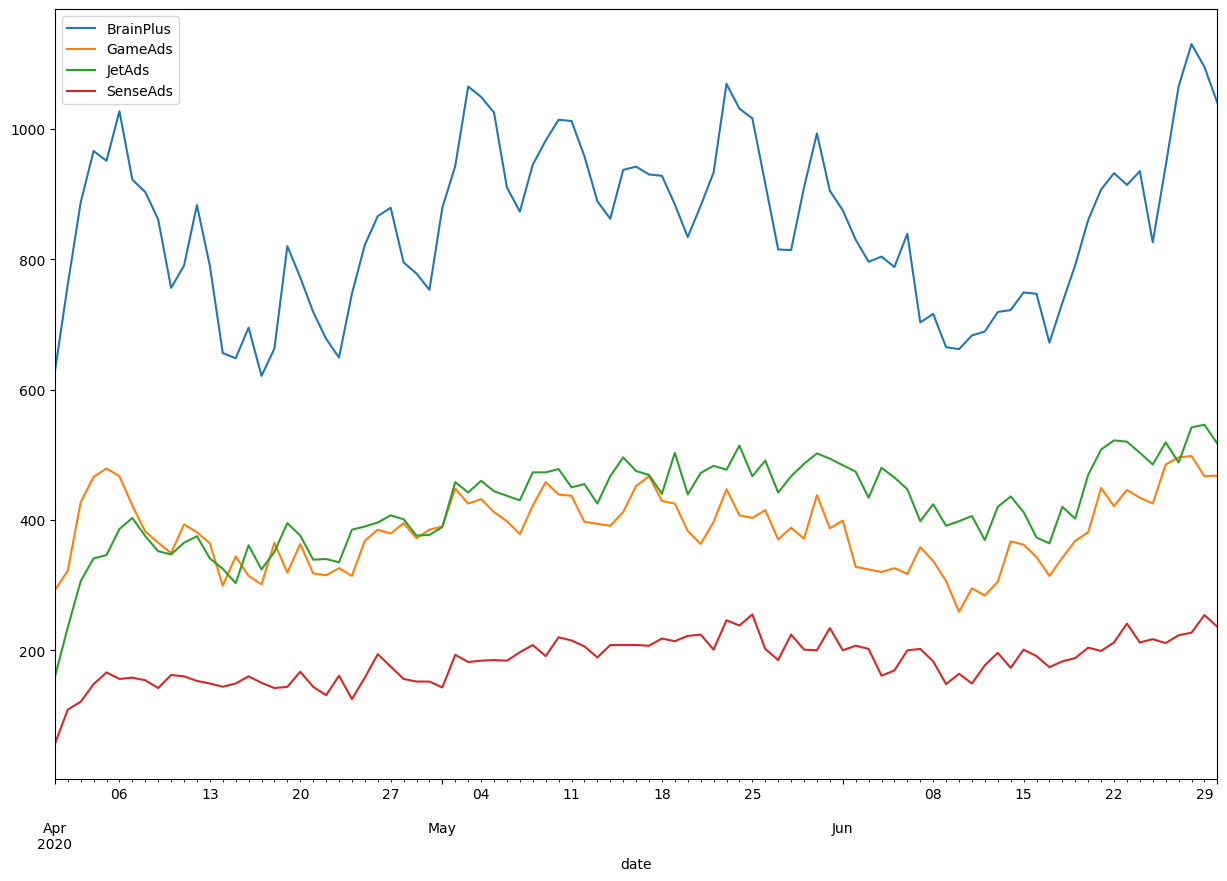

In [7]:
daucha = pd.read_excel('hw_lesson03_dau_channel.xlsx')
daucha['date'] = pd.to_datetime(daucha['date'])
daucha.set_index('date', inplace=True)
daucha.plot(figsize=(15, 10));

Вывод: больше всего brainplus 

Задание 2

In [8]:
meanch1 = daucha['BrainPlus'].mean()
meanch2 = daucha['GameAds'].mean()
meanch3 = daucha['JetAds'].mean()
meanch4 = daucha['SenseAds'].mean()
#след строчку нельзя использовать дважды, поэтому через #


#daucha.insert(4, 'Total', daucha['BrainPlus'] + daucha['GameAds'] + daucha['JetAds'] + daucha['SenseAds']) 


daucha

,BrainPlus,GameAds,JetAds,SenseAds
date,,,,
2020-04-01,627,292,159,56
2020-04-02,761,322,235,109
2020-04-03,887,427,306,121
2020-04-04,966,466,341,148
2020-04-05,951,479,346,166
...,...,...,...,...
2020-06-26,943,485,519,211
2020-06-27,1065,496,488,223
2020-06-28,1130,498,542,227


In [16]:
daucha['Total'] = daucha.sum(axis = 1)
dauchaperc = daucha
dauchaperc

,BrainPlus,GameAds,JetAds,SenseAds,Total
date,,,,,
2020-04-01,55.291005,25.749559,14.021164,4.938272,1234.0
2020-04-02,53.328662,22.564821,16.468115,7.638402,1527.0
2020-04-03,50.947731,24.526134,17.576106,6.950029,1841.0
2020-04-04,50.286309,24.258199,17.751171,7.704321,2021.0
2020-04-05,48.970134,24.665294,17.816684,8.547889,2042.0
...,...,...,...,...,...
2020-06-26,43.697868,22.474513,24.050046,9.777572,2258.0
2020-06-27,46.875000,21.830986,21.478873,9.815141,2372.0
2020-06-28,47.142261,20.775970,22.611598,9.470171,2497.0


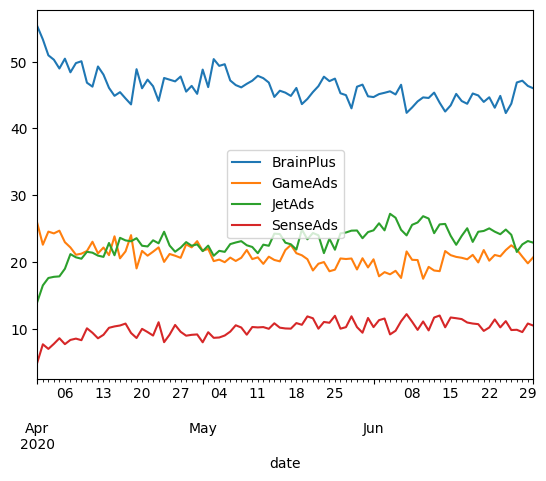

In [10]:
dauchaperc['BrainPlus'] = daucha['BrainPlus'] / daucha['Total'] * 100
dauchaperc['GameAds'] = daucha['GameAds'] / daucha['Total'] * 100
dauchaperc['JetAds'] = daucha['JetAds'] / daucha['Total'] * 100
dauchaperc['SenseAds'] = daucha['SenseAds'] / daucha['Total'] * 100
dauchaperc[['BrainPlus', 'GameAds', 'JetAds', 'SenseAds']].plot();

Задание 3

In [11]:
maureg = pd.read_excel('hw_lesson03_mau_region.xlsx')
maureg = maureg.set_index('month')

mauregcopy = maureg
mauregcopy.loc[5, 'Africa'] = 5000
mauregcopy

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America
month,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241
5,5000,1937,5432,6884,4872,5930,2587,4119
6,2805,1846,4941,6225,4387,5383,2361,3805


In [12]:
def summ(df):
    mausum = df['Africa'] + df['Australia']
    if mausum > df['CIS']:
        return mausum
    else:
        return 0

In [13]:
mauregcopy['Result'] = mauregcopy.apply(summ, axis=1)
mauregcopy

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America,Result
month,,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241,0
5,5000,1937,5432,6884,4872,5930,2587,4119,6937
6,2805,1846,4941,6225,4387,5383,2361,3805,0


In [14]:
mauregcopy['EU превышает порог'] = True
mauregcopy.loc[mauregcopy['Europe'] >= 4000, 'EU превышает порог'] = False

mauregcopy

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America,Result,EU превышает порог
month,,,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241,0,True
5,5000,1937,5432,6884,4872,5930,2587,4119,6937,False
6,2805,1846,4941,6225,4387,5383,2361,3805,0,False


Задание 4

            BrainPlus  GameAds  JetAds  SenseAds
date                                            
2020-04-01        627      292     159        56
2020-04-02        761      322     235       109
2020-04-03        887      427     306       121
2020-04-04        966      466     341       148
2020-04-05        951      479     346       166
...               ...      ...     ...       ...
2020-06-26        943      485     519       211
2020-06-27       1065      496     488       223
2020-06-28       1130      498     542       227
2020-06-29       1095      467     546       254
2020-06-30       1040      468     517       236

[91 rows x 4 columns]
None
            Andoroid  iPhone
date                        
2020-04-01       786     348
2020-04-02       996     431
2020-04-03      1193     548
2020-04-04      1307     614
2020-04-05      1297     645
...              ...     ...
2020-06-26      1462     696
2020-06-27      1553     719
2020-06-28      1672     725
2020-06-29      

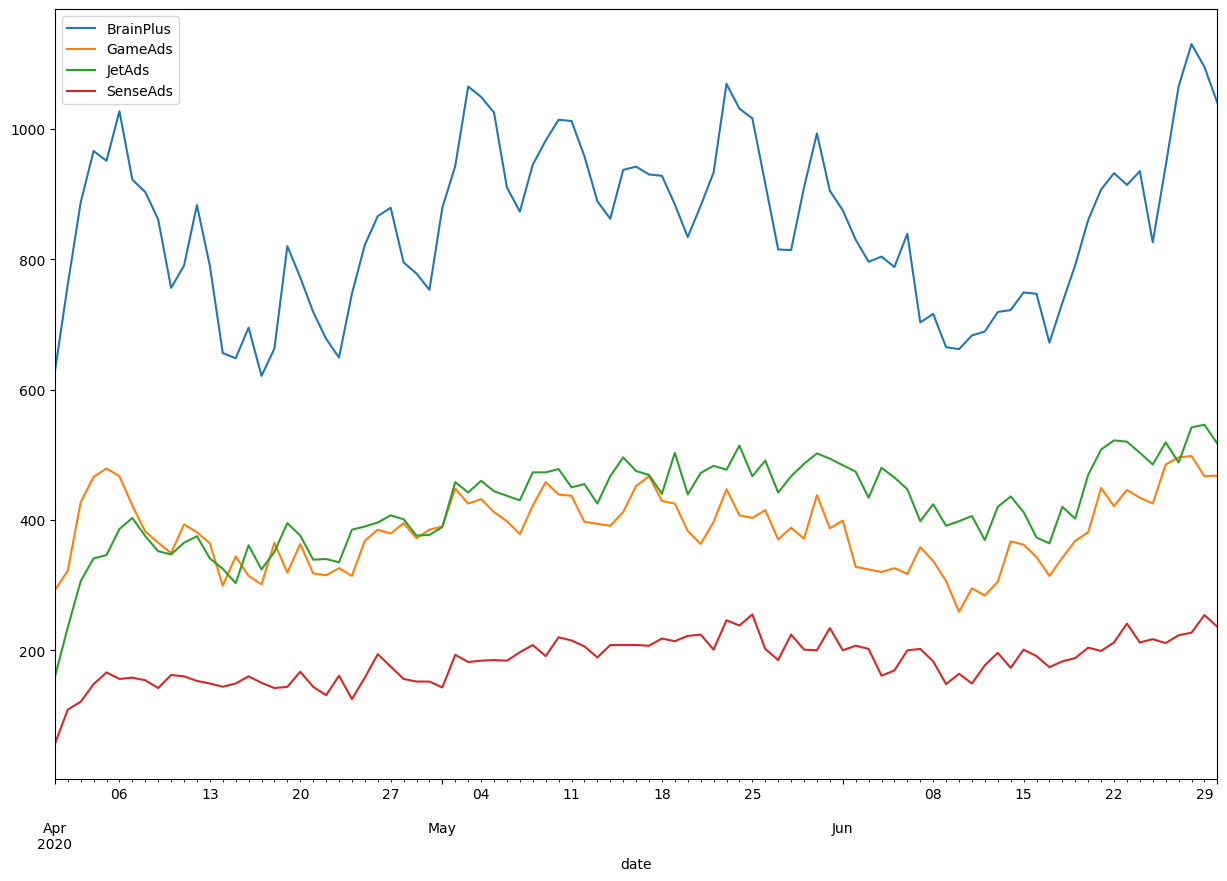

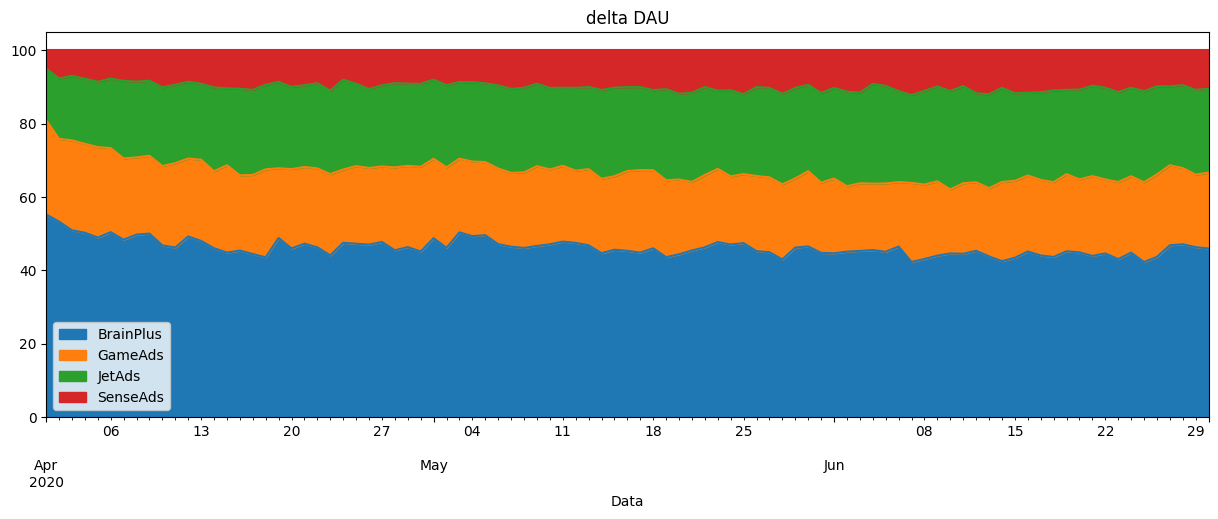

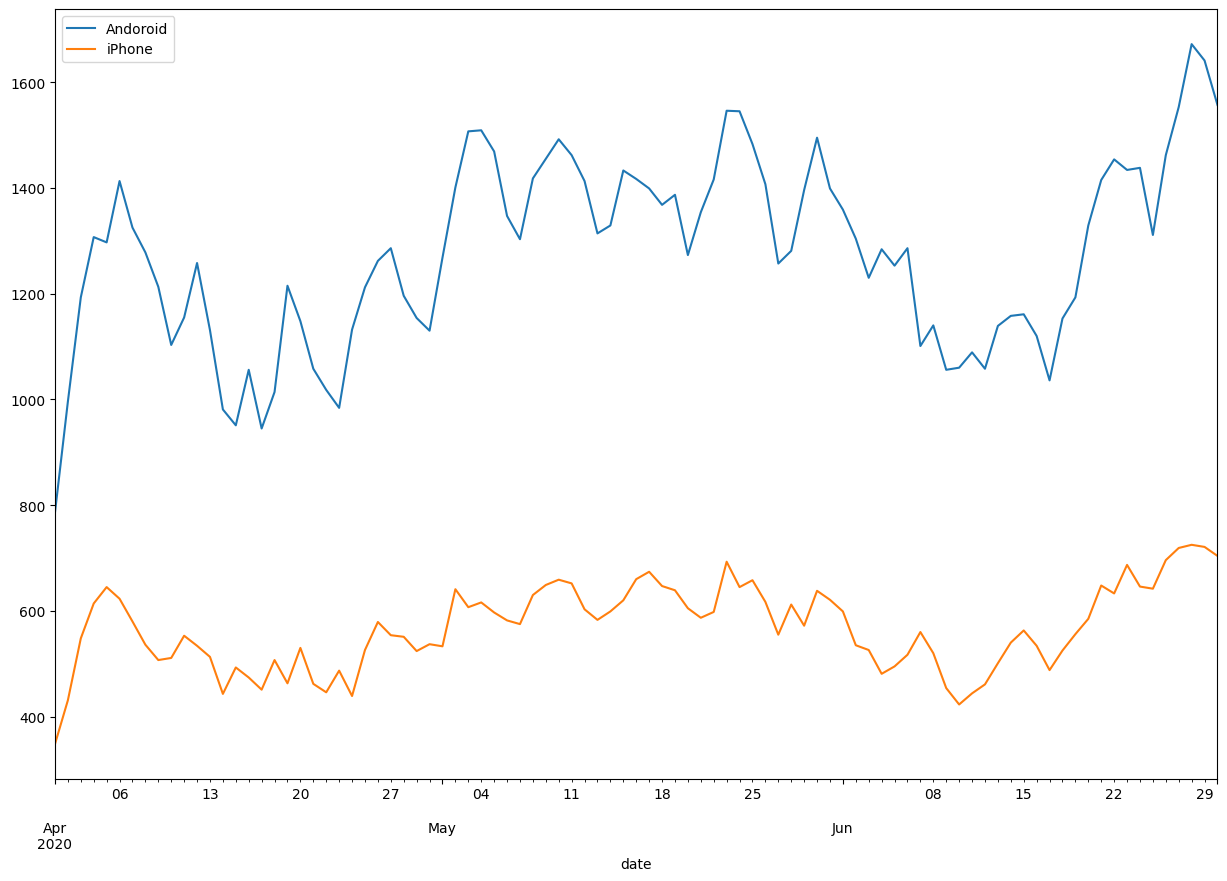

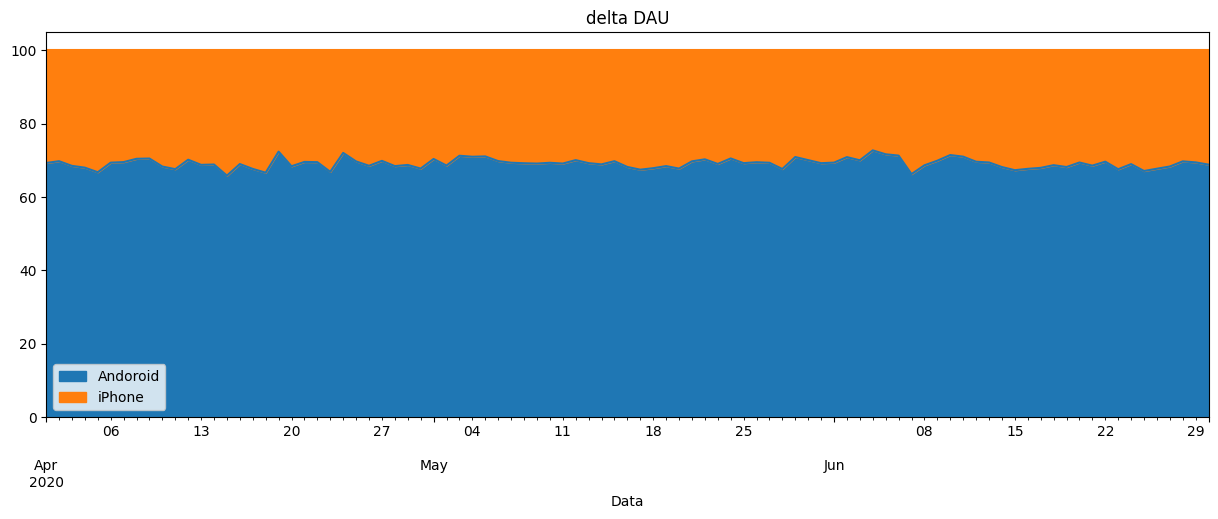

In [17]:
def dfanalys(dafr):
    daudataframe = pd.read_excel(dafr)
    daudataframe['date'] = pd.to_datetime(daudataframe['date'])
    daudataframe.set_index('date', inplace=True)
    print(daudataframe)
    daudataframe.plot(figsize=(15, 10));
    daudataframe['Total'] = daudataframe.sum(axis=1)
    for i in list(daudataframe.columns):
        daudataframe[str(i)] = daudataframe[str(i)]/daudataframe['Total']*100
    del daudataframe['Total']
    daudataframe[list(daudataframe.columns)].plot.area(figsize=(15, 5))
    plt.title('delta DAU')
    plt.xlabel('Data')


print(dfanalys('hw_lesson03_dau_channel.xlsx'))
print(dfanalys('hw_lesson03_dau_device.xlsx'))